In [1]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

## Import Data

In [2]:
# Load the data, contained in the segmentation data csv file.
df_segmentation = pd.read_csv('data/Mall_Customers.csv', index_col = 0)

## Explore Data

In [3]:
df_segmentation.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df_segmentation.shape

(200, 4)

In [5]:
# Encode gender to numeric
df_segmentation['Gender'] = df_segmentation['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
# Rename the columns
df_segmentation.rename({'Annual Income (k$)': 'Income',
                       'Spending Score (1-100)': 'Spending Score'}, axis=1, inplace=True,                       )

In [7]:
df_segmentation.describe()

,Gender,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


## Correlation Estimate

In [8]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df_segmentation.corr()

,Gender,Age,Income,Spending Score
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Income,-0.056410,-0.012398,1.000000,0.009903
Spending Score,0.058109,-0.327227,0.009903,1.000000


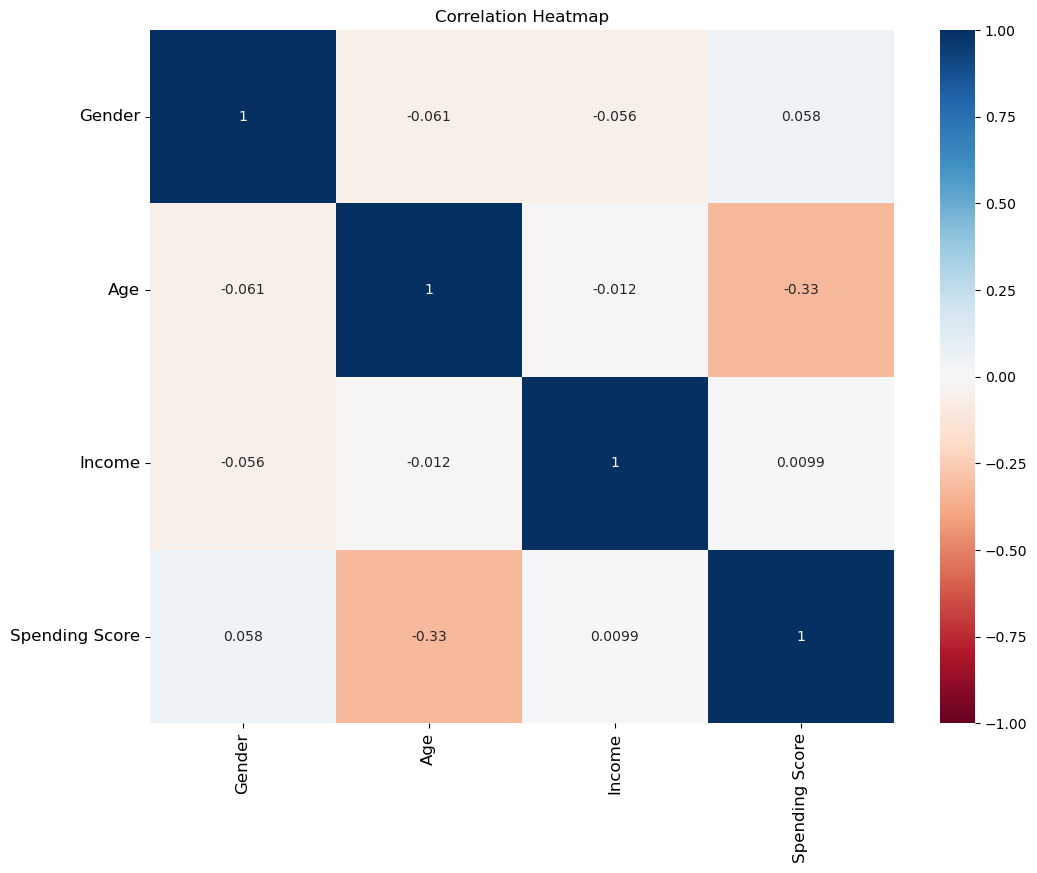

In [9]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others.
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

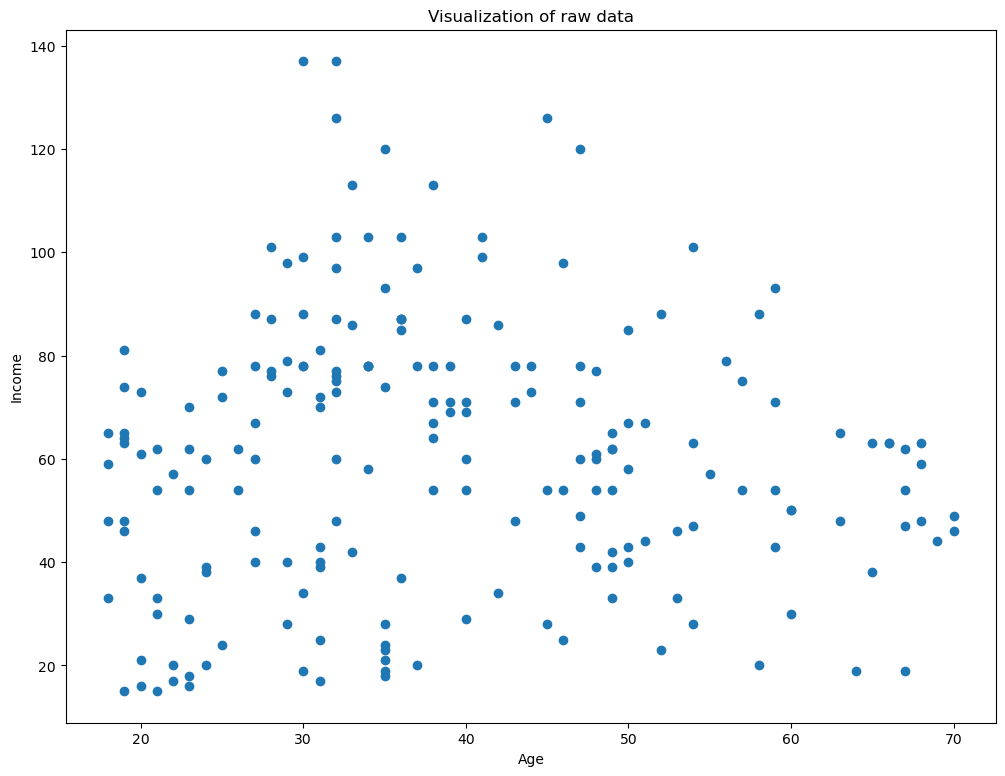

In [10]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:,1], df_segmentation.iloc[:,2])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## Standarization

In [11]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchical Clustering

In [12]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std)

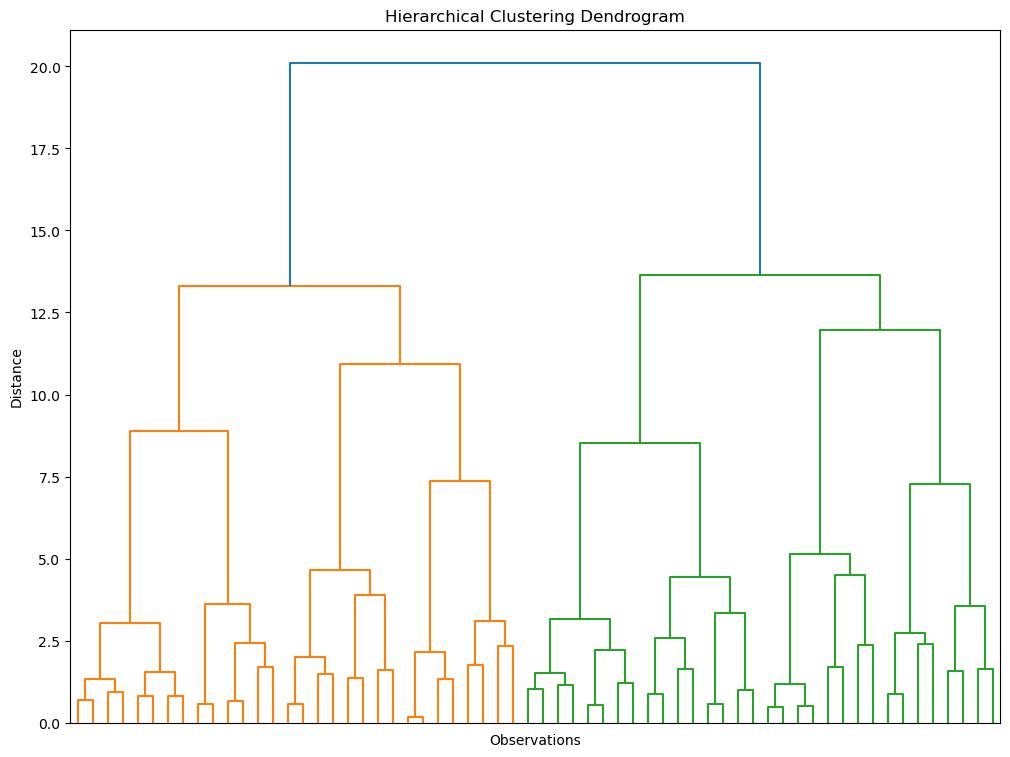

In [20]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. 
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## K-means Clustering

In [93]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

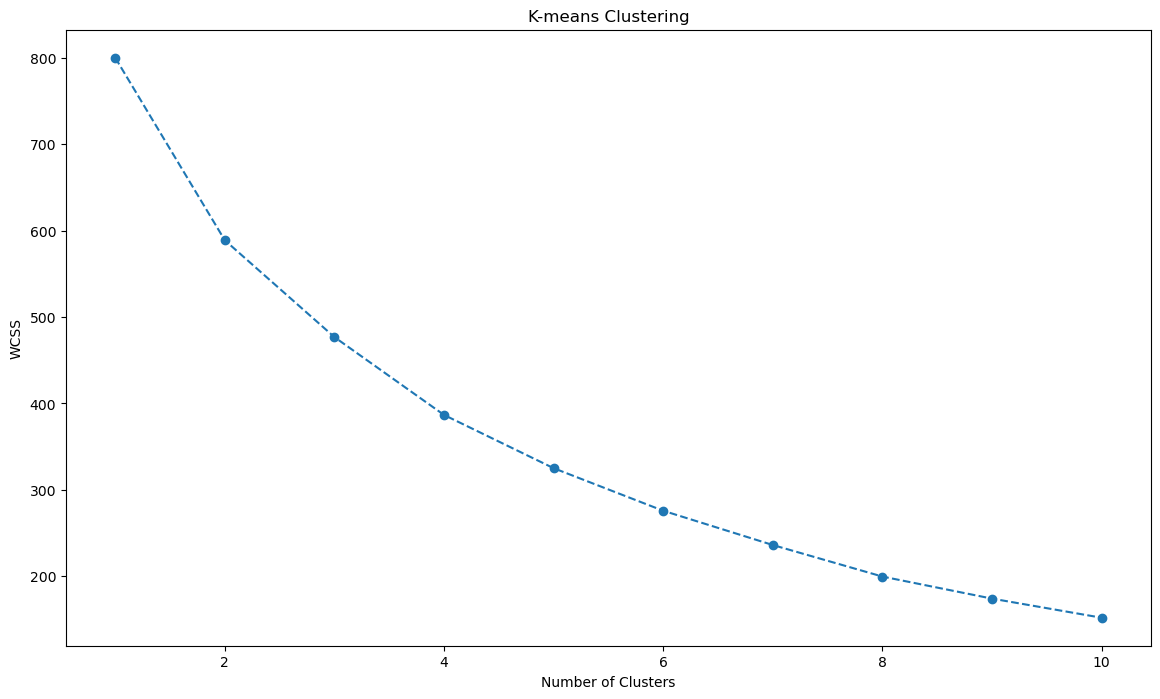

In [102]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (14,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [108]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)

In [109]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

### Sillhoute Score

In [54]:
from sklearn.metrics import silhouette_score

In [79]:
import warnings
# Filter out the specific warnings related to KMeans
warnings.warn("ignore", category=UserWarning)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20388\624917139.py:3: UserWarning: ignore
  warnings.warn("ignore", category=UserWarning)


In [84]:
for i in range(2, 11):
    # We run K-means with a fixed number of clusters. In our case 4.
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42, n_init=10)
    # We fit the data into our model
    kmeans.fit(segmentation_std)
    
    silhouette_avg = silhouette_score(segmentation_std, kmeans.labels_)
    print(f"Silhoute score of {i} clusters: {silhouette_avg}")

Silhoute score of 2 clusters: 0.25181529157884364
Silhoute score of 3 clusters: 0.25951265087431563
Silhoute score of 4 clusters: 0.3016237438985174
Silhoute score of 5 clusters: 0.31709067955763137
Silhoute score of 6 clusters: 0.3336281031933481
Silhoute score of 7 clusters: 0.3573771582429211
Silhoute score of 8 clusters: 0.3873969164416462
Silhoute score of 9 clusters: 0.40225202468243715
Silhoute score of 10 clusters: 0.4203423769946011


## Results

In [110]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [111]:
df_segm_kmeans.head()

,Gender,Age,Income,Spending Score,Segment K-means
CustomerID,,,,,
1,0,19,15,39,3
2,0,21,15,81,3
3,1,20,16,6,2
4,1,23,16,77,1
5,1,31,17,40,1


In [112]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Gender,Age,Income,Spending Score
Segment K-means,,,,
0,0.0,49.437500,62.416667,29.208333
1,1.0,28.438596,59.666667,67.684211
2,1.0,48.109091,58.818182,34.781818
3,0.0,28.250000,62.000000,71.675000


In [113]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Gender']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [114]:
df_segm_analysis

,Gender,Age,Income,Spending Score,N Obs,Prop Obs
Segment K-means,,,,,,
0,0.0,49.437500,62.416667,29.208333,48,0.240
1,1.0,28.438596,59.666667,67.684211,57,0.285
2,1.0,48.109091,58.818182,34.781818,55,0.275
3,0.0,28.250000,62.000000,71.675000,40,0.200


In [115]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'wise customer', 
                                                                  1:'standard customer',
                                                                  2:'rare customer', 
                                                                  3:'active customer'})

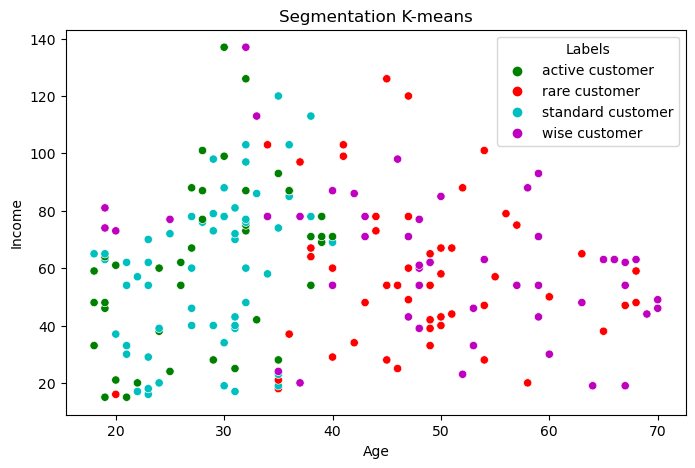

In [123]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (8, 5))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20388\1965401360.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y'], legend=False)


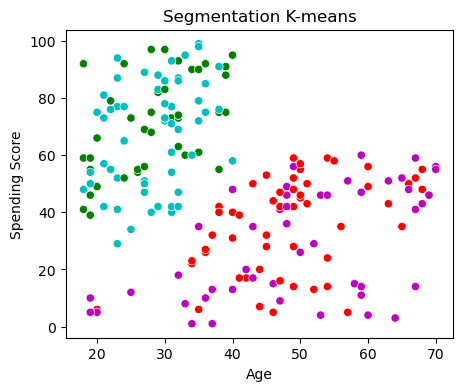

In [121]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Spending Score']
plt.figure(figsize = (5, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y'], legend=False)
plt.title('Segmentation K-means')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30264\1279089453.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y'])


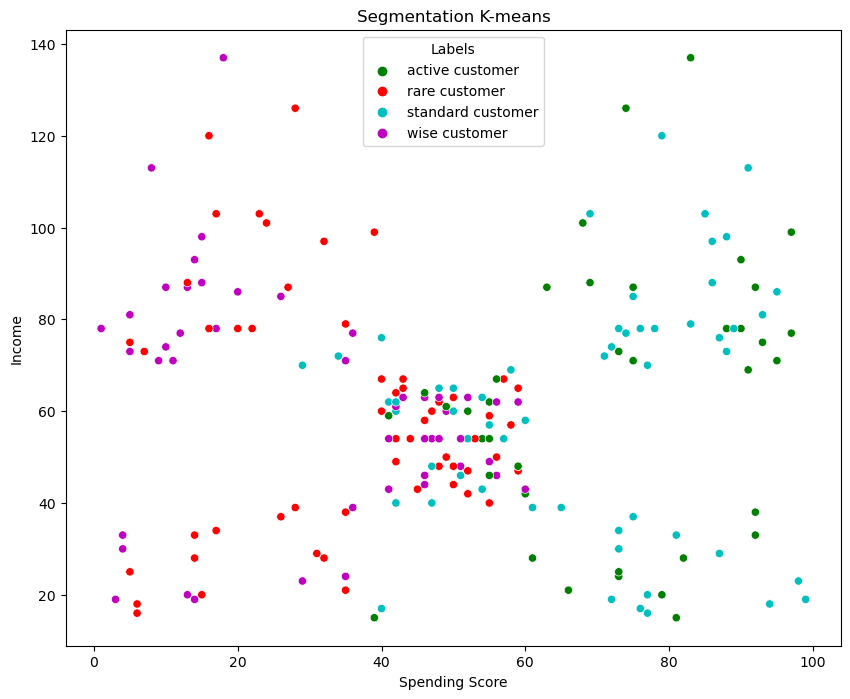

In [102]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Spending Score']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Segmentation K-means')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20388\1266789299.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y'])


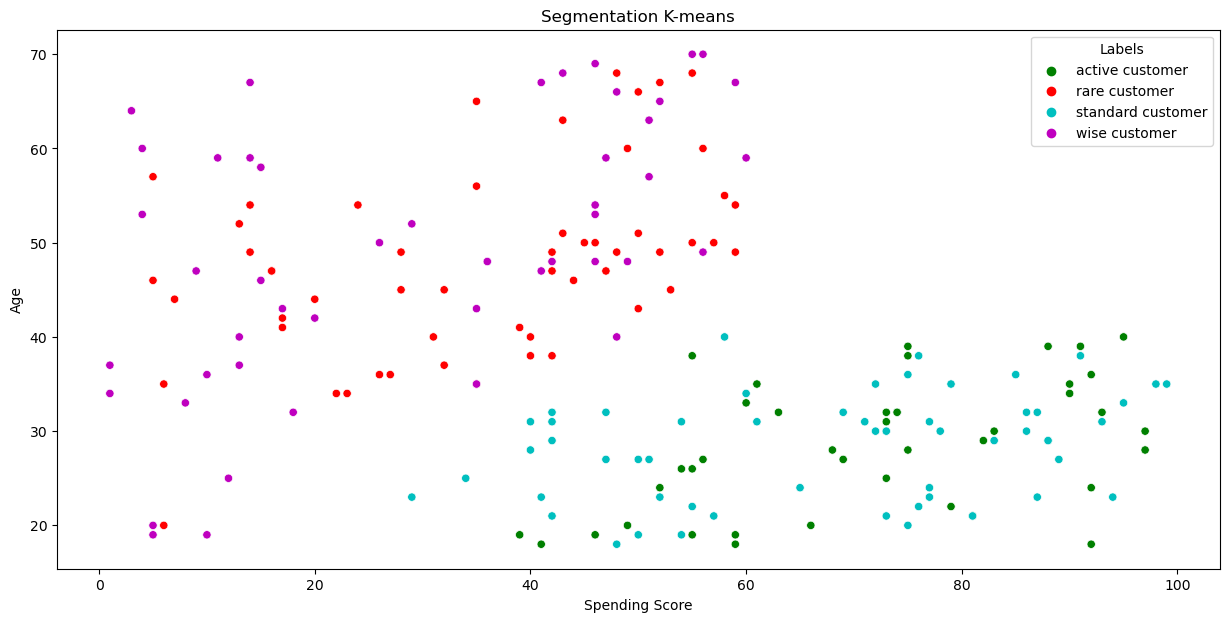

In [118]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Spending Score']
y_axis = df_segm_kmeans['Age']
plt.figure(figsize = (15, 7))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Segmentation K-means')
plt.show()

### PCA

In [104]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [105]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [106]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.33690046, 0.26230645, 0.23260639, 0.16818671])

In [107]:
pca.explained_variance_ratio_.cumsum()

array([0.33690046, 0.5992069 , 0.83181329, 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

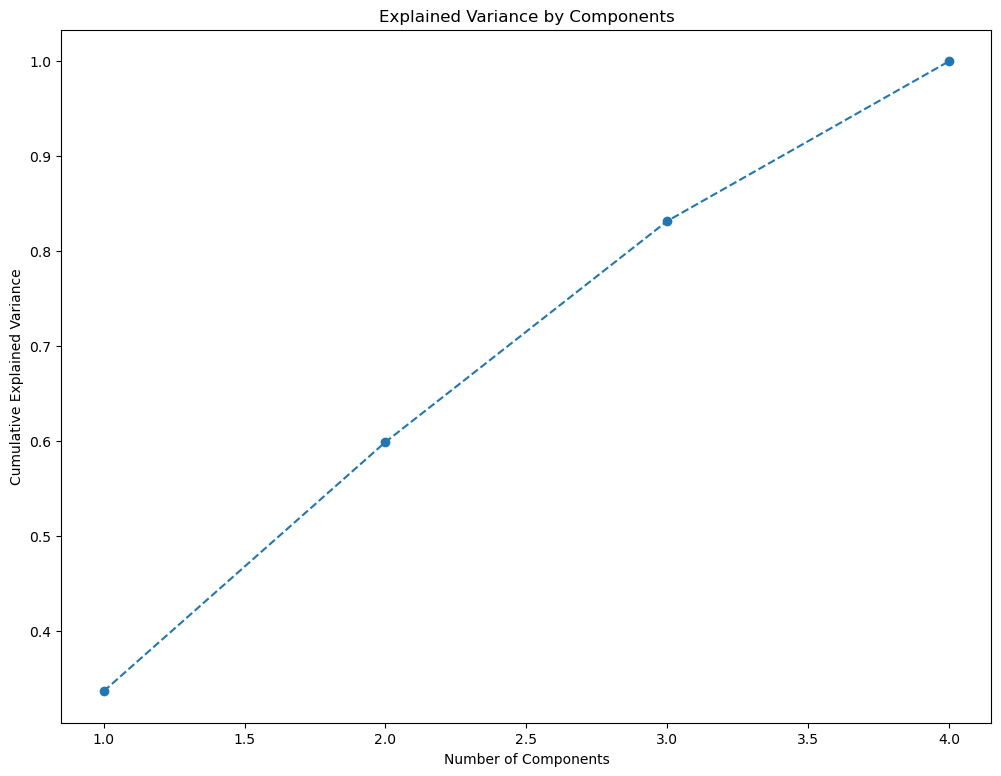

In [108]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [109]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [110]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)

### PCA Results

In [111]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.23430156,  0.68790025, -0.00608217, -0.68691996],
       [-0.62688553, -0.10368955,  0.7652519 ,  0.10321115],
       [ 0.74300906,  0.12238438,  0.64366712, -0.13657317]])

In [112]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Gender,Age,Income,Spending Score
Component 1,-0.234302,0.687900,-0.006082,-0.686920
Component 2,-0.626886,-0.103690,0.765252,0.103211
Component 3,0.743009,0.122384,0.643667,-0.136573


([<matplotlib.axis.YTick at 0x1fd12327df0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

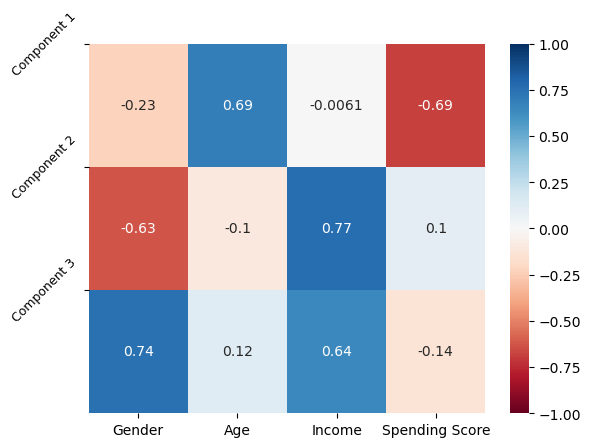

In [113]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [114]:
pca.transform(segmentation_std)

array([[-4.06382715e-01, -5.20713635e-01, -2.07252663e+00],
       [-1.42767287e+00, -3.67310199e-01, -2.27764369e+00],
       [ 5.07605706e-02, -1.89406774e+00, -3.67375232e-01],
       [-1.69451310e+00, -1.63190805e+00, -7.17466691e-01],
       [-3.13108383e-01, -1.81048272e+00, -4.26459924e-01],
       [-1.71744627e+00, -1.59926418e+00, -6.96379423e-01],
       [ 7.90821124e-01, -1.94727112e+00, -1.86491593e-01],
       [-2.14832159e+00, -1.50537369e+00, -7.58463596e-01],
       [ 2.77428623e+00, -8.82987672e-01, -1.38814112e+00],
       [-1.21629477e+00, -1.61640464e+00, -5.55769702e-01],
       [ 2.62905084e+00, -8.61237043e-01, -1.42011358e+00],
       [-1.68947038e+00, -1.54542784e+00, -6.55007647e-01],
       [ 1.68582253e+00, -2.02394479e+00,  1.69391673e-02],
       [-1.64607339e+00, -1.52251259e+00, -6.10409943e-01],
       [ 1.17443628e+00, -6.12790961e-01, -1.65373684e+00],
       [-1.32613070e+00, -2.36719149e-01, -2.13541457e+00],
       [ 1.67728253e-02, -1.74344572e+00

In [115]:
scores_pca = pca.transform(segmentation_std)

### K-means clustering with PCA

In [116]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

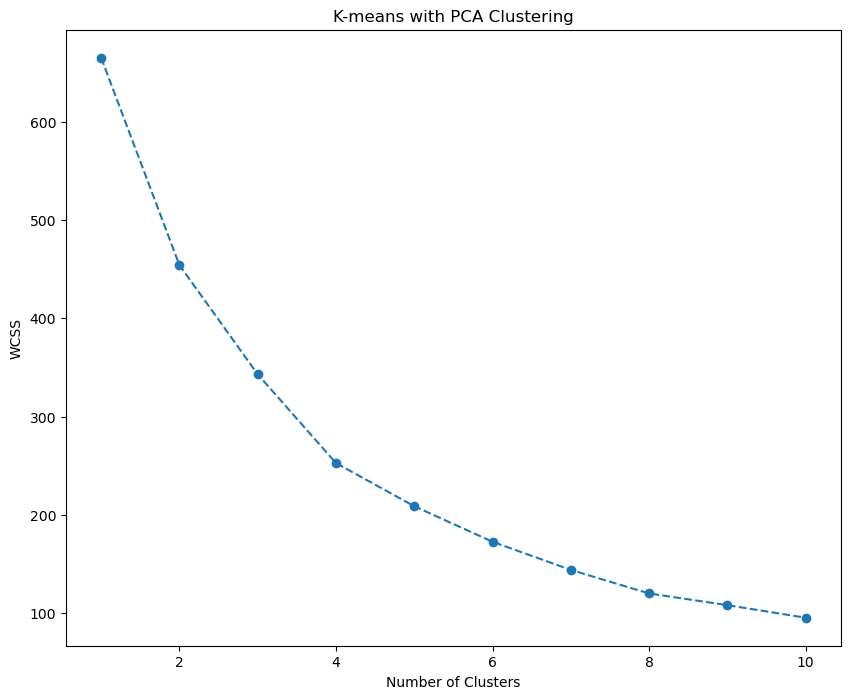

In [117]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [118]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [119]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

### K-means clustering with PCA Results

In [120]:
scores_pca

array([[-4.06382715e-01, -5.20713635e-01, -2.07252663e+00],
       [-1.42767287e+00, -3.67310199e-01, -2.27764369e+00],
       [ 5.07605706e-02, -1.89406774e+00, -3.67375232e-01],
       [-1.69451310e+00, -1.63190805e+00, -7.17466691e-01],
       [-3.13108383e-01, -1.81048272e+00, -4.26459924e-01],
       [-1.71744627e+00, -1.59926418e+00, -6.96379423e-01],
       [ 7.90821124e-01, -1.94727112e+00, -1.86491593e-01],
       [-2.14832159e+00, -1.50537369e+00, -7.58463596e-01],
       [ 2.77428623e+00, -8.82987672e-01, -1.38814112e+00],
       [-1.21629477e+00, -1.61640464e+00, -5.55769702e-01],
       [ 2.62905084e+00, -8.61237043e-01, -1.42011358e+00],
       [-1.68947038e+00, -1.54542784e+00, -6.55007647e-01],
       [ 1.68582253e+00, -2.02394479e+00,  1.69391673e-02],
       [-1.64607339e+00, -1.52251259e+00, -6.10409943e-01],
       [ 1.17443628e+00, -6.12790961e-01, -1.65373684e+00],
       [-1.32613070e+00, -2.36719149e-01, -2.13541457e+00],
       [ 1.67728253e-02, -1.74344572e+00

In [121]:
df_segmentation.head()

,Gender,Age,Income,Spending Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [122]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [123]:
df_segm_pca_kmeans

,Gender,Age,Income,Spending Score,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,19,15,39,-0.406383,-0.520714,-2.072527,2
1,0,21,15,81,-1.427673,-0.367310,-2.277644,2
2,1,20,16,6,0.050761,-1.894068,-0.367375,1
3,1,23,16,77,-1.694513,-1.631908,-0.717467,3
4,1,31,17,40,-0.313108,-1.810483,-0.426460,1
...,...,...,...,...,...,...,...,...
195,1,35,120,79,-1.179572,1.324568,1.932441,3
196,1,45,126,28,0.672751,1.221061,2.438084,1
197,0,32,126,74,-0.723719,2.765010,0.583178,2
198,0,32,137,18,0.767096,2.861930,1.150341,0


In [124]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Gender,Age,Income,Spending Score,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,
0,0.0,49.437500,62.416667,29.208333,1.346375,0.598558,-0.588323
1,1.0,47.803571,58.071429,34.875000,0.643591,-0.756396,0.757360
2,0.0,28.250000,62.000000,71.675000,-0.831991,0.914209,-1.009810
3,1.0,28.392857,60.428571,68.178571,-1.203347,-0.409660,0.468210


In [125]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Gender']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'wise customer', 
                                                                  1:'standard customer',
                                                                  2:'rare customer', 
                                                                  3:'active customer'})
df_segm_pca_kmeans_freq

,Gender,Age,Income,Spending Score,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,
wise customer,0.0,49.437500,62.416667,29.208333,1.346375,0.598558,-0.588323,48,0.24
standard customer,1.0,47.803571,58.071429,34.875000,0.643591,-0.756396,0.757360,56,0.28
rare customer,0.0,28.250000,62.000000,71.675000,-0.831991,0.914209,-1.009810,40,0.20
active customer,1.0,28.392857,60.428571,68.178571,-1.203347,-0.409660,0.468210,56,0.28


In [126]:
df_segm_pca_kmeans_freq[['Gender', 'Age', 'Spending Score', 'N Obs']]

,Gender,Age,Spending Score,N Obs
Segment K-means PCA,,,,
wise customer,0.0,49.437500,29.208333,48
standard customer,1.0,47.803571,34.875000,56
rare customer,0.0,28.250000,71.675000,40
active customer,1.0,28.392857,68.178571,56


In [127]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'wise customer', 
                                                                  1:'standard customer',
                                                                  2:'rare customer', 
                                                                  3:'active customer'})

In [128]:
df_segm_pca_kmeans['Legend'].value_counts(dropna=False)

standard customer    56
active customer      56
wise customer        48
rare customer        40
Name: Legend, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30264\1547245716.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'])


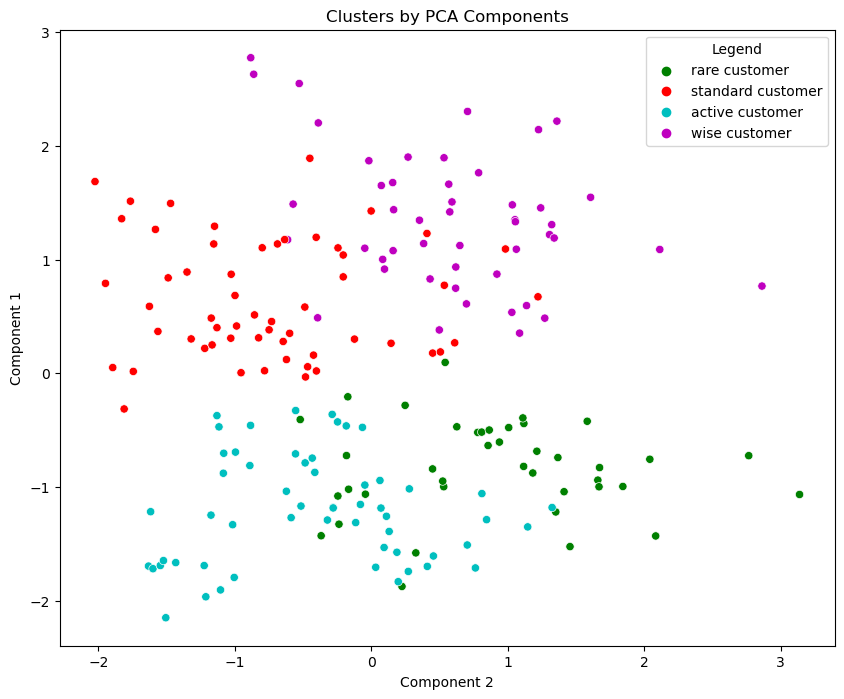

In [129]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30264\2146061291.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'])


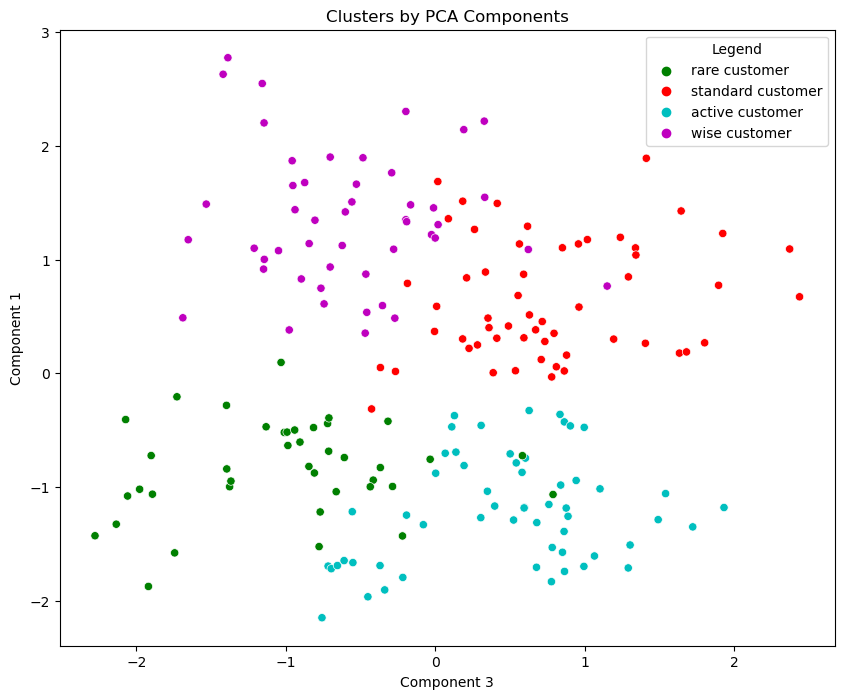

In [130]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30264\3902733220.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'])


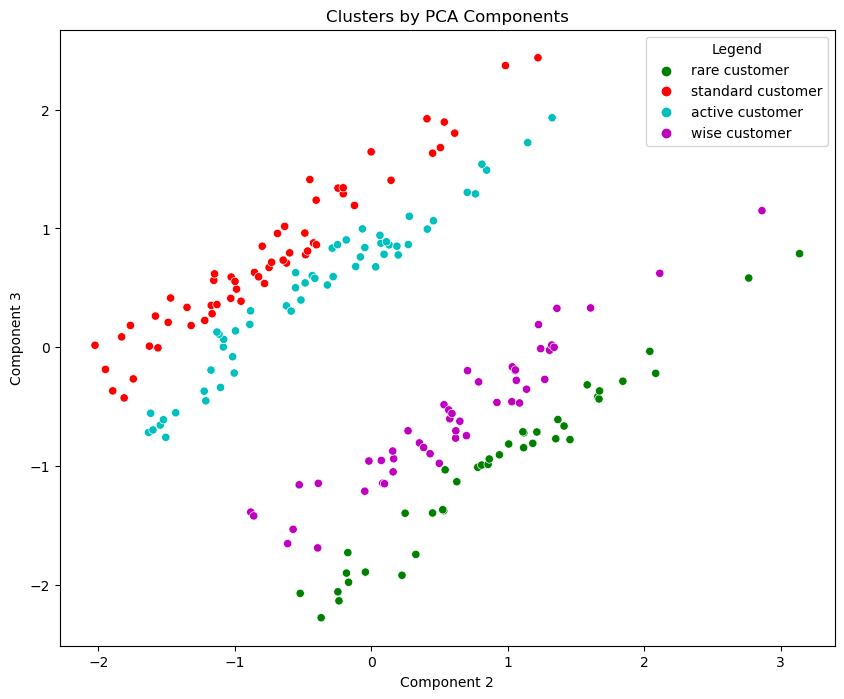

In [131]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis_1 = df_segm_pca_kmeans['Component 2']
y_axis_1 = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
ax = sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30264\3084581144.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'], legend=True)


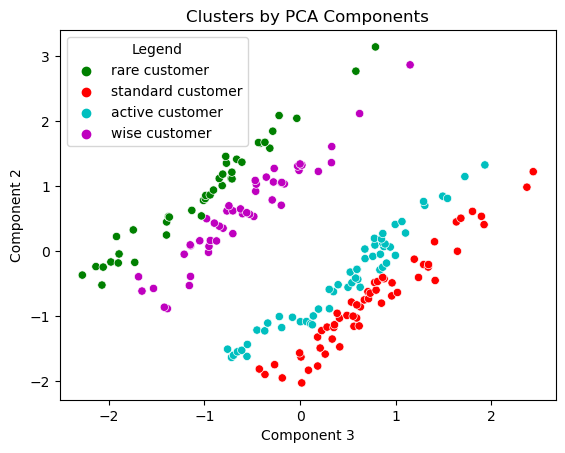

In [132]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']
# plt.figure(figsize = (5, 4))
sns.scatterplot(x=x_axis_1, y=y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm', 'y'], legend=True)
plt.title('Clusters by PCA Components')
plt.show()

### Predict with New Data

In [133]:
df_segm_pca_kmeans.head()

,Gender,Age,Income,Spending Score,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,19,15,39,-0.406383,-0.520714,-2.072527,2,rare customer
1,0,21,15,81,-1.427673,-0.367310,-2.277644,2,rare customer
2,1,20,16,6,0.050761,-1.894068,-0.367375,1,standard customer
3,1,23,16,77,-1.694513,-1.631908,-0.717467,3,active customer
4,1,31,17,40,-0.313108,-1.810483,-0.426460,1,standard customer


#### Create predict function

In [134]:
def predict_segment(data):
    x_scaled = scaler.transform(data)
    x_pca = pca.transform(x_scaled)
    
    segm_kmeans_pcanew =  kmeans_pca.predict(x_pca)
    predict_values = pd.DataFrame({'predict_segment':segm_kmeans_pcanew})
    predict_values['Legend'] = predict_values['predict_segment'].map({0:'wise customer', 
                                                                  1:'standard customer',
                                                                  2:'rare customer', 
                                                                  3:'active customer'})
    return predict_values

In [135]:
df_segm_pca_kmeans.head()

,Gender,Age,Income,Spending Score,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,19,15,39,-0.406383,-0.520714,-2.072527,2,rare customer
1,0,21,15,81,-1.427673,-0.367310,-2.277644,2,rare customer
2,1,20,16,6,0.050761,-1.894068,-0.367375,1,standard customer
3,1,23,16,77,-1.694513,-1.631908,-0.717467,3,active customer
4,1,31,17,40,-0.313108,-1.810483,-0.426460,1,standard customer


In [136]:
predict_segment([[0, 19, 15, 39],
                [0, 19, 20, 13],
                [0, 19, 100, 15],
                [1,19, 100, 15],
                [1,19, 25, 15],
                [1,19, 40, 15],
                [0,20,15,39]])

C:\Users\ASUS\anaconda3\envs\fachryds\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,predict_segment,Legend
0,2,rare customer
1,0,wise customer
2,2,rare customer
3,3,active customer
4,1,standard customer
5,1,standard customer
6,2,rare customer


### Export Model

In [137]:
# We save the objects we'll need in the Purchase Analytics part of the course. We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('saved_model2/scaler.pickle', 'wb'))

In [138]:
pickle.dump(pca, open('saved_model2/pca.pickle', 'wb'))

In [139]:
pickle.dump(kmeans_pca, open('saved_model2/kmeans_pca.pickle', 'wb'))

### Import Model

In [140]:
# We load our pickled objects in order to segment the purchase data set.
scaler = pickle.load(open('saved_model2/scaler.pickle', 'rb'))

In [141]:
pca = pickle.load(open('saved_model2/pca.pickle', 'rb'))

In [142]:
kmeans_pca = pickle.load(open('saved_model2/kmeans_pca.pickle', 'rb'))